In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def display_img(img,cmp='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=plt.subplot(111)
    ax.imshow(img,cmap='gray')

In [10]:
reeses=cv2.imread('../DATA/reeses_puffs.png',0)
cereals=cv2.imread('../DATA/many_cereals.jpg',0)

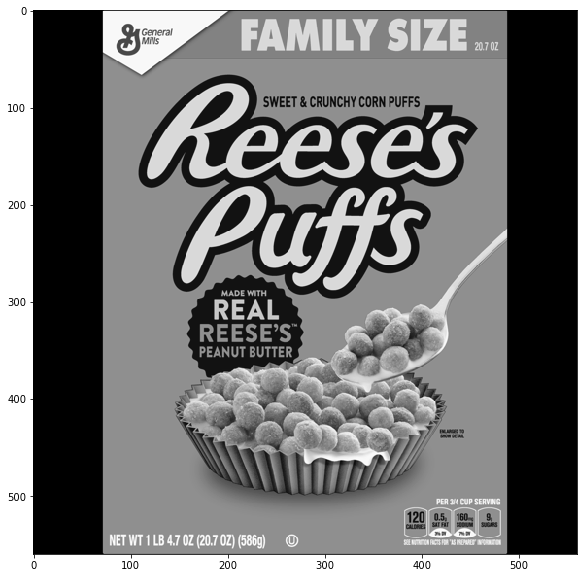

In [13]:
display_img(reeses)

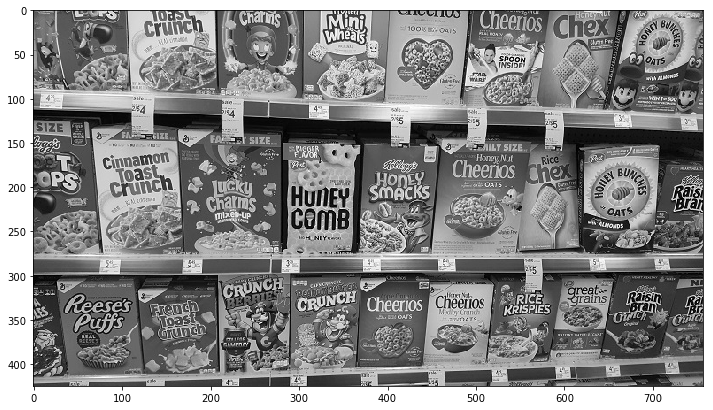

In [14]:
display_img(cereals)

In [15]:
# 1] Initiating SIFT detector

In [16]:
sift=cv2.xfeatures2d.SIFT_create()

In [17]:
sift

<xfeatures2d_SIFT 000001FB5D0B0A10>

In [18]:
# 2] finding keypoints and descriptors using sift detector

In [20]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [24]:
# 3] Creating BF matcher object  , since we are using sift use cv2.NORM_L2, 
#as this is already the default normType, so leave it as it is 

In [26]:
matcher=cv2.BFMatcher()

In [27]:
# 4] Use match method to match the descriptors of the two images
#using .knnMatch(), here we pass k value, which states the no. of matches to be returned for each descriptor.

In [28]:
matches=matcher.knnMatch(des1,des2,k=2)

In [30]:
matches[:4]
# as we can see two DMATCH objects or matches for each descriptor are returned,
# if we had passed k=3 , we would have got 3 matches for each descriptor.

[[<DMatch 000001FB5D12B110>, <DMatch 000001FB5CE32270>],
 [<DMatch 000001FB5CE320F0>, <DMatch 000001FB5CE32250>],
 [<DMatch 000001FB5CE321D0>, <DMatch 000001FB5CE32230>],
 [<DMatch 000001FB5CE322B0>, <DMatch 000001FB5CE32290>]]

In [31]:
# 5] Applying Ratio test (in place of sorting in case of and simple .match()).

#to check if each (both here) match is relatively close to each other in distance,
# then we would take the entire descriptor as a good match.

In [33]:
good=[]

# lesser distance better match.

for match1,match2 in matches:
    #If match1 distance is less than 75% of match2 distance, then descriptor was a good match, keep it.
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [37]:
#good[0:3]

[[<DMatch 000001FB5CE32E50>],
 [<DMatch 000001FB5CE2B430>],
 [<DMatch 000001FB5CE2B470>]]

In [40]:
len(good) # now we only have 78 best matches out of 1501 total matches

78

In [39]:
len(matches)

1501

In [42]:
# 6] drawing these matches, as we used knnMatch() we'll draw using cv2.drawMatchesKnn()

In [43]:
result=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

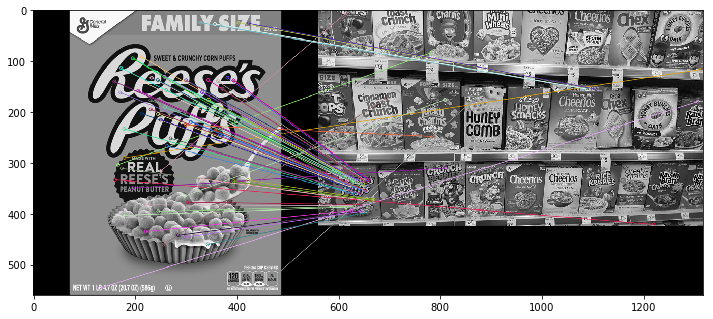

In [44]:
display_img(result)

In [45]:
# giving better result than ORB detector, 

In [47]:
# Able to find correct box from aisle even though the image was not exactly same e.g Fammily Size not written on the 
# detected box on the aisle.

In [48]:
# also able to find the common descriptors in different objects in the image too e.g. Family Size.

In [51]:
result=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)


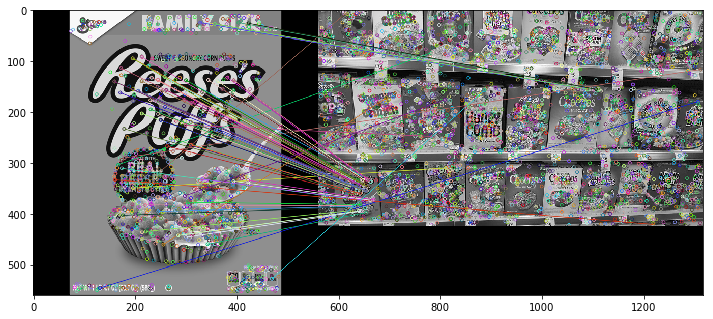

In [50]:
display_img(result) 